In [14]:
import pandas as pd
import yfinance as yf
from datetime import date, datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [15]:
start_date = '2023-11-28'
end_date = '2024-12-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2023-11-28  End Date: 2024-12-1


In [16]:
ticker = 'MCD'

df = yf.download(ticker, start=start_date, end=end_date)
df.head(15)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MCD,MCD,MCD,MCD,MCD,MCD
Date,,,,,,
2023-11-28,275.422180,282.089996,283.540009,281.350006,281.500000,2199600
2023-11-29,273.752594,280.380005,282.470001,279.500000,282.209991,2433400
2023-11-30,276.826904,281.839996,282.279999,278.059998,280.420013,5030400
2023-12-01,280.873596,285.959991,286.859985,283.000000,283.250000,4967400
2023-12-04,281.040619,286.130005,287.399994,284.989990,284.989990,3522900
2023-12-05,281.443329,286.540009,288.760010,285.209991,286.549988,3005300
2023-12-06,281.757599,286.859985,287.369995,283.399994,286.730011,2765100
2023-12-07,281.688873,286.790009,288.149994,285.640015,287.489990,3131900


In [17]:
df1 = yf.download(ticker,start='2024-11-11',end=date.today())
df1 = df1['Close']
df1.columns = ['Close']
df1.shape

[*********************100%***********************]  1 of 1 completed


(37, 1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2023-11-28 to 2024-11-29
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, MCD)  254 non-null    float64
 1   (Close, MCD)      254 non-null    float64
 2   (High, MCD)       254 non-null    float64
 3   (Low, MCD)        254 non-null    float64
 4   (Open, MCD)       254 non-null    float64
 5   (Volume, MCD)     254 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


In [19]:
df.isnull().sum()

Price      Ticker
Adj Close  MCD       0
Close      MCD       0
High       MCD       0
Low        MCD       0
Open       MCD       0
Volume     MCD       0
dtype: int64

In [20]:
df.duplicated().sum()

0

<Axes: xlabel='Date'>

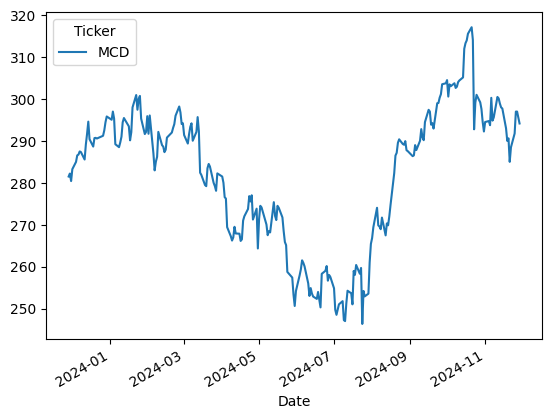

In [21]:
df['Open'].plot()

<Axes: xlabel='Date'>

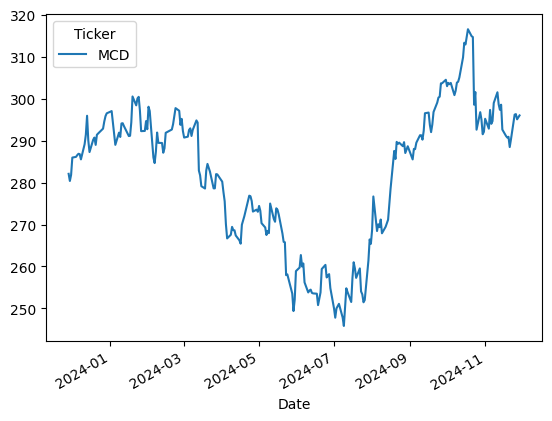

In [22]:
df['Close'].plot()

In [23]:
# df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
# df.head(14)
# df[['Close','Close Rolling 10']].plot()
# df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()
# df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
# df
# df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()
# #cummulative MOving average
# df['CMA']=df['Close'].expanding().mean()
# df
# df[['Close','CMA']].plot()

In [24]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adf_test(df['Close'])

ADF Statistics: -1.4014567460854765
p- value: 0.581577537217435
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,First Difference
Ticker,MCD,MCD,MCD,MCD,MCD,MCD,
Date,,,,,,,
2023-11-28,275.422180,282.089996,283.540009,281.350006,281.500000,2199600,NaN
2023-11-29,273.752594,280.380005,282.470001,279.500000,282.209991,2433400,-1.709991
2023-11-30,276.826904,281.839996,282.279999,278.059998,280.420013,5030400,1.459991
2023-12-01,280.873596,285.959991,286.859985,283.000000,283.250000,4967400,4.119995
2023-12-04,281.040619,286.130005,287.399994,284.989990,284.989990,3522900,0.170013


In [27]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -15.409854296759388
p- value: 3.13396337273357e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

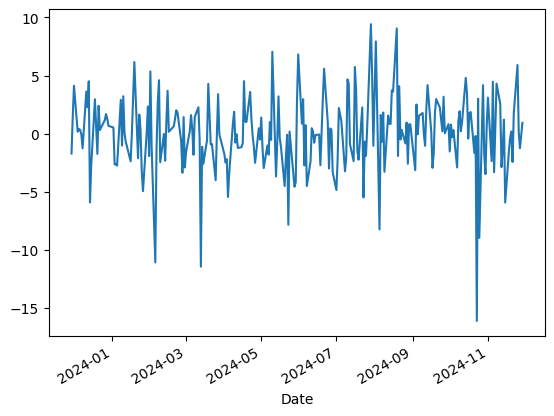

In [28]:
df['First Difference'].dropna().plot()

In [29]:
# df['Second Difference'] = df['First Difference']-df['First Difference'].shift(1)
# df
# Applying Auto_ARIMA
# step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
# step.summary()

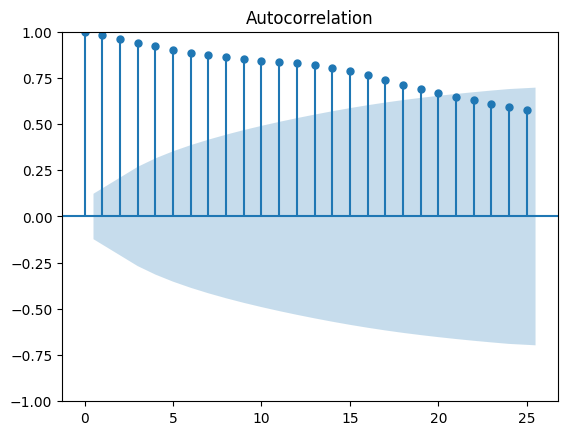

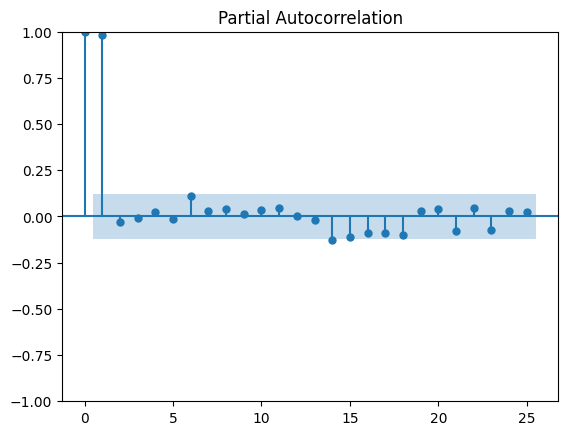

In [30]:
acf = plot_acf(df["Close"].dropna())
pacf = plot_pacf(df["Close"].dropna())

In [31]:
model_ARIMA=ARIMA(df['Close'].dropna(),order=(15,2,3))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax

In [32]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    MCD   No. Observations:                  254
Model:                ARIMA(15, 2, 3)   Log Likelihood                -639.940
Date:                Mon, 06 Jan 2025   AIC                           1317.881
Time:                        22:29:41   BIC                           1384.940
Sample:                             0   HQIC                          1344.864
                                - 254                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3715      0.352     -1.054      0.292      -1.062       0.319
ar.L2          0.5511      0.307      1.792      0.073      -0.052       1.154
ar.L3         -0.0507      0.086     -0.591      0.555      -0.219       0.118
ar.L4          0.0507      0.085      0.595      0.552      -0.116       0.218
ar.L5         -0.0707      0.082     -0.861      0.389      -0.232       0.090
ar.L6         -0.1027      0.095     -1.078      0.281      -0.289       0.084
ar.L7          0.0263      0.113      0.233      0.815      -0.195       0.247
ar.L8          0.0205      0.096      0.213      0.831      -0.168       0.209
ar.L9          0.0046      0.098      0.047      0.963      -0.187       0.196
ar.L10        -0.0782      0.085     -0.918      0.359      -0.245       0.089
ar.L11         0.0024      0.111      0.022      0.982      -0.216       0.220
ar.L12         0.0627      0.085      0.741      0.459      -0.103       0.228
ar.L13         0.1213      0.078      1.559      0.119      -0.031       0.274
ar.L14         0.1981      0.104      1.901      0.057      -0.006       0.402
ar.L15         0.0669      0.121      0.553      0.580      -0.170       0.304
ma.L1         -0.6409      0.355     -1.807      0.071      -1.336       0.054
ma.L2         -0.9525      0.160     -5.942      0.000      -1.267      -0.638
ma.L3          0.5960      0.304      1.959      0.050      -0.000       1.192
sigma2         9.2059      0.888     10.364      0.000       7.465      10.947
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               206.57
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -0.91
Prob(H) (two-sided):                  0.30   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
pred_arima=model_ARIMA_fit.predict(start=datetime(2023,12,1),end=datetime(2024,11,29))

In [34]:
# residuals=df['Close']-pred_arima
# model_ARIMA_fit.resid.plot()
# model_ARIMA_fit.resid.plot(kind='kde')

In [35]:
df['Predicted_ARIMA']=pred_arima

<Axes: xlabel='Date'>

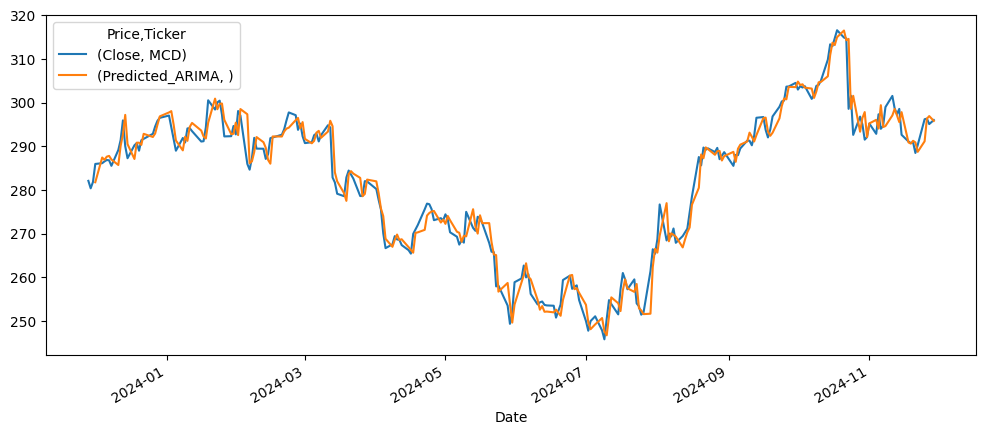

In [36]:
df[['Close','Predicted_ARIMA']].plot(figsize=(12,5))

In [37]:
forecast_steps = 37
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


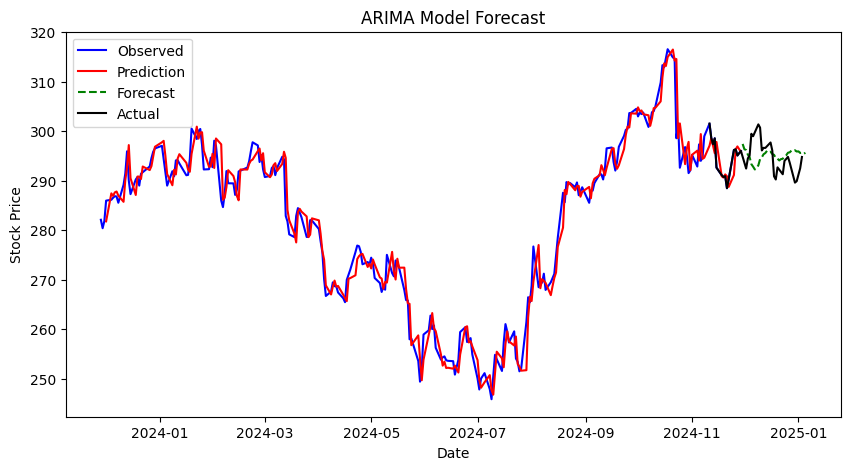

In [38]:
# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed',color='blue')
plt.plot(df['Predicted_ARIMA'],label= 'Prediction',color='red')

future_dates = [df.index[-1] + pd.Timedelta(days=i) for i in range(1, forecast_steps + 1)]

plt.plot(future_dates,forecast, label='Forecast', color='green',linestyle='--')
plt.plot(df1['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Calculating Prediction Accuracy

In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [40]:
test_data = yf.download(ticker, start='2023-12-1', end=end_date)
test_data = np.array(test_data['Close'].values)
test_data

[*********************100%***********************]  1 of 1 completed


array([[285.95999146],
       [286.13000488],
       [286.54000854],
       [286.85998535],
       [286.79000854],
       [285.52999878],
       [289.1499939 ],
       [291.42001343],
       [295.92999268],
       [290.01998901],
       [287.26998901],
       [290.23001099],
       [290.73001099],
       [288.98999023],
       [291.39001465],
       [291.70001221],
       [292.85998535],
       [294.54998779],
       [295.83999634],
       [296.51000977],
       [297.04000854],
       [294.39001465],
       [291.73999023],
       [288.98999023],
       [291.8999939 ],
       [290.86999512],
       [294.08999634],
       [294.1499939 ],
       [293.47000122],
       [291.08999634],
       [291.16000366],
       [294.35998535],
       [300.52999878],
       [298.41000366],
       [300.04998779],
       [300.44000244],
       [297.20999146],
       [292.26000977],
       [292.30999756],
       [294.6499939 ],
       [292.72000122],
       [298.07998657],
       [297.04998779],
       [285

In [41]:
test_data.shape,pred_arima.shape

((251, 1), (251,))

In [42]:
rmse = np.sqrt(mean_squared_error(test_data, pred_arima))
mean_actual = np.mean(test_data)

# Accuracy Calculation
accuracy = 100 - (rmse / mean_actual * 100)

print(f"Accuracy: {accuracy:.2f}%")
print(f"RMSE: {rmse:.2f}")

Forecasting Accuracy: 98.91%
RMSE: 3.06


Calculating Forecasting Accuracy

In [43]:
future_actual_prices= np.array(df1['Close'].dropna())
future_actual_prices.shape

(37,)

In [44]:
future_forecast= np.array(forecast)
future_forecast.shape

(37,)

In [45]:
df1['Close'].shape

(37,)

In [46]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape_forecast = np.mean(np.abs((future_actual_prices - future_forecast) / future_actual_prices)) * 100

# Calculate accuracy
accuracy_forecast = 100 - mape_forecast

# Print results
print(f"Forecasting Accuracy: {accuracy_forecast:.2f}%")
print(f"MAPE for Forecasting: {mape_forecast:.2f}%")


Forecasting Accuracy: 99.03%
MAPE for Forecasting: 0.97%
